# <center>درس سیگنال‌ها و سیستم‌ها</center>
<h3><center>میناسادات محمودی<br>بهار ۱۴۰۲</center></h3>

<div dir="rtl">

***نام و نام‌خانوادگی:***
رضا صومی

***شماره دانشجویی:***
98105857
</div>


<div dir="rtl">

1. قسمت اول پروژه خود را تا تاریخ ۲۰ تیر ۱۴۰۲ از طریق کویرا تحویل دهید.
2. اصولا مشورت دانشجویان در حل تمرین‌ها و پروژه نه تنها نکوهیده نیست، بلکه شدیدا توصیه می‌شود اما هرگونه رونویسی خلاف اصول علمی-اخلاقی دانشگاه است و به شدت با آن برخورد می‌شود.
3. سعی کنید کد‌های خود را در محل مناسب در این notebook بنویسید، توصیه می‌شود برای فهم بهتر مصحح، از کامنت‌گذاری گویا  (فارسی یا انگلیسی) استفاده کنید.
4. بهترین منابع در اختیار شما صفحات Discrete cosine transform و JPEG در ویکیپدیا هستند. در صورت ابهام به آنها رجوع کنید. (در صورت پروژه نیز به آنها ارجاع داده شده است.)
5. سوالات خود را از طریق نوشته مربوطه در کویرا مطرح کنید تا دستیاران پروژه به آنها پاسخ دهند و بقیه نیز از سوال و جواب ها بهره ببرند.
   
</div>

## <center> بخش اول پروژه <br><div dir="rtl">پیاده‌سازی فشرده سازی JPEG</div></center>

<div dir="rtl">

فرض کنید می‌خواهید عکسی را فشرده‌سازی کنید. برای این کار ابتدا پارامترهایی را حذف یا کمرنگ می‌کنید که چشم انسان نسبت به آن‌ها کمتر حساس است. اگر تصویری را به مولفه های فرکانسی آن خرد کنیم، چشم انسان کمتر به فرکانس‌های بالا دقت می‌کند. پس با حذف این فرکانس ها می توان حجم تصویر را کم کرد؛ الگوریتم فشرده‌سازی JPEG از همین ایده برای کم‌ کردن حجم تصاویر استفاده می‌کند. اکنون از شما می‌خواهیم که قدم به قدم یک عکس را فشرده‌سازی کنید و دوباره آن را به حالت اولیه باز گردانید. برای راحتی، فرض می کنیم عکس ورودی، سیاه و سفید است.<br>
<center>
   <img src="https://www.researchgate.net/profile/Jacinta-Oshea-2/publication/7232959/figure/fig2/AS:282593288310787@1444386898429/High-and-low-spatial-frequency-information-Images-contain-different-spatial-frequencies_W640.jpg" alt="Drawing" style="width: 600px;"/>
    <center>چپ: عکس اصلی، وسط: فرکانس‌های پایین، راست: فرکانس‌های بالا؛همانطور که مشاهده می‌شود، فرکانس‌های پایین شمای کلی تصویر و فرکانس‌های بالا لبه ها و جزئیات را در بر دارند.</center>
</center>

</div>

<div dir="rtl">

### گام صفر: کتابخانه‌ها<br>
کتابخانه‌های لازم برای پروژه در زیر آمده است
اگر به کتابخانه دیگری نیاز دارید آن را اضافه کنید و دلیل نیاز خود را نیز توضیح دهید.

</div>

In [364]:
import numpy as np
import cv2 as cv #install using pip: "pip install opencv-python"
import matplotlib.pyplot as plt
import seaborn as sns #install using pip: "pip install seaborn"
import random
import os

<div dir="rtl">

### گام اول: خواندن عکس<br>
در این گام با استفاده از CV2 عکس مورد نظر را می خوانیم. چون تصویر را به صورت خاکستری یا grayscale باز می‌کنیم، تصویر یک آرایه دو بعدی خواهد بود که هر مولفه آن، نشان دهنده روشنایی یک پیکسل است.

</div>

(height, width):  (1654, 1260)


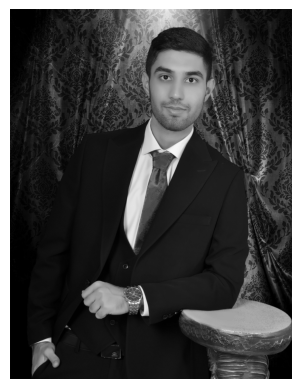

True

In [365]:
image_path = "Phase1_Pics/reza.jpg"
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
print("(height, width): ", image.shape) # height, width
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()
cv.imwrite("Phase1_Pics/reza_gray.jpg", image)

<div dir="rtl">

### گام دوم: خرد کردن عکس به قطعه های 8x8<br>
لازم است که عکس را به قطعات 8x8 تقسیم کنیم و در هر یک از این قطعات مولفه های فرکانسی طولی و عرضی را استخراج کنیم و تصمیم بگیریم کدام یک را حذف کنیم. پس تابعی بنویسید که با گرفتن عکس، مربع های 8x8 آن را به صورت لیست(به ترتیب از 0,0 تا خانه آخر) خروجی دهد. طول و عرض عکس بر ۸ بخش پذیر نبود، بقیه خانه ها را صفر فرض کنید.

</div>

Number of squares: 32342


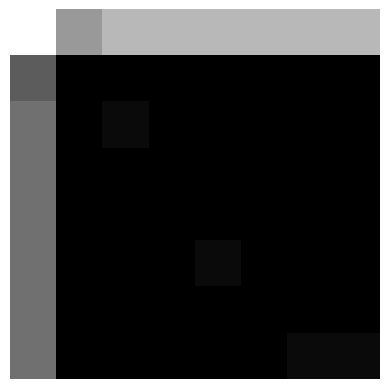

In [366]:
def extract_squares(image):
    height, width = image.shape
    num_rows = height // 8
    num_cols = width // 8

    squares = []

    for i in range(num_rows):
        for j in range(num_cols):
            square = image[i*8:(i+1)*8, j*8:(j+1)*8]
            if square.shape == (8, 8):
                squares.append(square)

    return squares

squares = extract_squares(image)

print("Number of squares:", len(squares))
plt.imshow(squares[0], cmap='gray')
plt.axis('off')
plt.show()

<div dir="rtl">

### گام سوم: Discrete Cosine Transform<br>
اکنون می خواهیم برای استخراج مولفه های فرکانسی مربع های 8x8 خود از DCT استفاده کنیم. ابتدا تابعی بنویسید که DCT-II را روی یک سیگنال یک بعدی اجرا کند. رابطه زیر ضرایب تبدیل کسینوسی را به شما می دهد.([ویکیپدیا](https://en.wikipedia.org/wiki/Discrete_cosine_transform#DCT-II))<br>
$${\displaystyle X_{k}=\sum _{n=0}^{N-1}x_{n}\cos \left[\,{\tfrac {\,\pi \,}{N}}\left(n+{\tfrac {1}{2}}\right)k\,\right]\qquad {\text{ for }}~k=0,\ \dots \ N-1~.}$$

</div>

In [367]:
def dct_1d(signal):
    N = len(signal)
    dct_signal = np.zeros_like(signal, dtype=float)

    for k in range(N):
        sum_value = 0.0
        for n in range(N):
            sum_value += signal[n] * np.cos(np.pi / N * (n + 0.5) * k)
        dct_signal[k] = sum_value * np.sqrt(1/2) if k == 0 else sum_value

    return dct_signal

signal = np.array([1, 2, 3, 4, 5, 6, 7, 8])
dct_signal = dct_1d(signal)
print("DCT signal:", dct_signal)

DCT signal: [ 2.54558441e+01 -1.28846460e+01 -2.66453526e-15 -1.34690960e+00
  0.00000000e+00 -4.01805807e-01 -3.15303339e-14 -1.01404646e-01]


<div dir="rtl">

### گام چهارم: تبدیل روی ماتریس<br>
برای اعمال DCT روی ماتریس 8x8 ابتدا از همه ی اعداد ماتریس خود ۱۲۸ واحد کم کنید. اینگونه بازه ی اعداد شما از ${(0,255)}$ به ${(-128,127)}$ تغییر می کند و مقدار ثابت آن حذف می شود. سپس برای DCT دو بعدی یکبار روی طول و یکبار روی عرض تابع خود DCT را پیاده کنید. می توانید این کار را با تابع `np.apply_along_axis` انجام دهید.<br>
<center>
 <img src="https://upload.wikimedia.org/wikipedia/commons/2/24/DCT-8x8.png"/>
    <center>در بالا تابع dct-II را به صورت دو بعدی می بینید. گرادیان روشنایی به تاریکی نشان دهنده میزان تابع از مثبت یک تا منفی یک است.</center>
</center>

<br>
علاوه بر روشی که ما اجرا کردیم می‌توان با ماتریس ضرب ماتریسی نیز DCT را پیاده کرد. برای این کار نیاز به ماتریس تبدیل مثل ${C}$ داریم. آنگاه با استفاده از رابطه زیر DCT محاسبه می شود:
$${X = C x C^{T}}$$

برای جزئیات بیشتر در رابطه با محاسبه نبدیل با فرم ماتریسی، به [این لینک](https://fairyonice.github.io/2D-DCT.html) مراجعه کنید.


</div>

In [251]:
from scipy.fftpack import idct, dct

In [368]:
def dct_2d(matrix):
    matrix = matrix - 128

    dct_rows = np.apply_along_axis(dct_1d, axis=1, arr=matrix)

    dct_2d = np.apply_along_axis(dct_1d, axis=0, arr=dct_rows)

    return dct_2d

matrix = np.array([[255, 255, 255, 255, 255, 255, 255, 255],
                   [255, 255, 255, 255, 255, 255, 255, 255],
                   [255, 255, 255, 255, 255, 255, 255, 255],
                   [255, 255, 255, 255, 255, 255, 255, 255],
                   [255, 255, 255, 255, 255, 255, 255, 255],
                   [255, 255, 255, 255, 255, 255, 255, 255],
                   [255, 255, 255, 255, 255, 255, 255, 255],
                   [255, 255, 255, 255, 255, 255, 255, 255]])

dct_matrix = dct_2d(matrix)
print("DCT matrix:")
print(dct_matrix)

DCT matrix:
[[ 4.06400000e+03  3.21554936e-13 -4.01943669e-13  4.82332403e-13
   1.60777468e-13 -2.41166202e-13 -3.13516062e-12  4.96400432e-12]
 [ 1.13686838e-13  3.78653235e-29 -2.52435490e-29  1.26217745e-29
   1.89326617e-29 -6.31088724e-30 -1.00974196e-28  1.00974196e-28]
 [-4.54747351e-13 -2.52435490e-29  5.04870979e-29 -3.78653235e-29
  -1.26217745e-29  1.89326617e-29  3.02922588e-28 -6.05845175e-28]
 [ 4.54747351e-13  4.41762107e-29 -5.04870979e-29  6.31088724e-29
   2.20881053e-29 -3.15544362e-29 -4.03896783e-28  6.05845175e-28]
 [ 2.27373675e-13  1.26217745e-29 -1.89326617e-29  1.26217745e-29
   6.31088724e-30 -6.31088724e-30 -1.00974196e-28  2.01948392e-28]
 [-2.27373675e-13 -1.89326617e-29  1.89326617e-29 -4.41762107e-29
  -9.46633086e-30  2.20881053e-29  1.51461294e-28 -3.02922588e-28]
 [-3.12638804e-12 -2.46124602e-28  3.12388918e-28 -3.72342347e-28
  -1.23062301e-28  1.86171174e-28  2.42338070e-27 -3.73604525e-27]
 [ 4.80326889e-12  3.91275009e-28 -5.01715536e-28  5.8060

<div dir="rtl">

### گام پنجم: Quantization<br>
حالا که ضرایب را به دست آورده‌ایم، می‌خواهیم آن‌هایی را که اهمیت کمتری دارند، حذف کنیم. برای این کار از یک ماتریس Quantization استفاده می کنیم. این ماتریس به ما نشان می دهد که تا چه حد اجازه داریم ضرایب فرکانس بالا را حذف کنیم.([ویکیپدیا](https://en.wikipedia.org/wiki/JPEG#Quantization))<br>
در زیر این ماتریس برای کیفیت های ۱۰، ۵۰ و ۹۰ به شما داده‌شده است؛ توجه کنید که کیفیت ۱۰۰ بالاترین کیفیت و ۰ پایین‌ترین کیفیت است. برای فشرده‌سازی لازم است که اعضای ماتریس بدست آمده از DCT را بر اعضای متناظر خود در ماتریس Quantization تقسیم کنیم و عدد بدست آمده را گرد کنیم.

</div>

In [369]:
quality_levels = {
        10: np.array([  [80, 60, 50, 80, 120, 200, 255, 255],
                        [55, 60, 70, 95, 130, 255, 255, 255],
                        [70, 65, 80, 120, 200, 255, 255, 255],
                        [70, 85, 110, 145, 255, 255, 255, 255],
                        [90, 110, 185, 255, 255, 255, 255, 255],
                        [120, 175, 255, 255, 255, 255, 255, 255],
                        [245, 255, 255, 255, 255, 255, 255, 255],
                        [255, 255, 255, 255, 255, 255, 255, 255]]),

        50: np.array([  [16, 11, 10, 16, 24, 40, 51, 61],
                        [12, 12, 14, 19, 26, 58, 60, 55],
                        [14, 13, 16, 24, 40, 57, 69, 56],
                        [14, 17, 22, 29, 51, 87, 80, 62],
                        [18, 22, 37, 56, 68, 109, 103, 77],
                        [24, 35, 55, 64, 81, 104, 113, 92],
                        [49, 64, 78, 87, 103, 121, 120, 101],
                        [72, 92, 95, 98, 112, 100, 103, 99]]),

        90: np.array([  [3, 2, 2, 3, 5, 8, 10, 12],
                        [2, 2, 3, 4, 5, 12, 12, 11],
                        [3, 3, 3, 5, 8, 11, 14, 11],
                        [3, 3, 4, 6, 10, 17, 16, 12],
                        [4, 4, 7, 11, 14, 22, 21, 15],
                        [5, 7, 11, 13, 16, 12, 23, 18],
                        [10, 13, 16, 17, 21, 24, 24, 21],
                        [14, 18, 19, 20, 22, 20, 20, 20]])
    }

In [370]:
def quantization(matrix, q_matrix):
    quantized_matrix = np.round(matrix / q_matrix).astype(int)
    return quantized_matrix

matrix = np.array([[100, 200, 300, 400, 500, 600, 700, 800],
                   [900, 1000, 1100, 1200, 1300, 1400, 1500, 1600],
                   [1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400],
                   [2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200],
                   [3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000],
                   [4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800],
                   [4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600],
                   [5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400]])

quality_level = 90
quantization_matrix = quality_levels[quality_level]

quantized_matrix = quantization(matrix, quantization_matrix)
print("Quantized matrix:")
print(quantized_matrix)

Quantized matrix:
[[ 33 100 150 133 100  75  70  67]
 [450 500 367 300 260 117 125 145]
 [567 600 633 400 262 200 164 218]
 [833 867 675 467 290 176 194 267]
 [825 850 500 327 264 173 186 267]
 [820 600 391 338 281 383 204 267]
 [490 385 319 306 252 225 229 267]
 [407 322 311 300 277 310 315 320]]


<div dir="rtl">

### گام ششم: حذف عناصر اضافه<br>
<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/4/43/JPEG_ZigZag.svg" alt="Drawing" style="width: 400px;"/>
</center>

در این مرحله ماتریس بدست آمده از مرحله قبل را به‌صورت زیگ‌زاگ(مانند شکل بالا) می‌خوانیم. با این کار باید یک دنباله به طول ۶۴ بدست بیاوریم. اکنون از آخرین عدد غیر صفر دنباله به بعد را حذف می کنیم. بعد از آن دنباله را می نویسیم(بین دو عدد متوالی ویرگول می گذاریم) و هر جایی که صفر دیدیم نمی نویسیم.(که طول رشته مان کمتر شود.)<br>
مثالی برای ورودی و خروجی یک ماتریس 4x4 در زیر آورده شده است.

</div>

In [371]:
# input
#[  1,   5,   23,   0,
#  12, 119,    7,   0,
#   6,   0,    0,   0,
#   0,   8,    0,   0]
# sequence
# [1,5,12,6,119,23,0,7,0,0,8,0,0,0,0,0]
# removing last zeros
# [1,5,12,6,119,23,0,7,0,0,8]
# removing zeros in the middle and returning a string
# "1,5,12,6,119,23,,7,,,8"

def matrix_to_string(matrix):
    sequence = []
    rows, cols = matrix.shape
    for i in range(rows + cols - 1):
        if i % 2 == 1:
            for j in range(i+1):
                row = j
                col = i - j
                if row < rows and col < cols:
                    sequence.append(matrix[row, col])
        else:
            for j in range(i+1):
                row = i - j
                col = j
                if row < rows and col < cols:
                    sequence.append(matrix[row, col])

    while len(sequence) > 0 and sequence[-1] == 0:
        sequence.pop()

    string = ""
    for num in sequence:
        if num != 0:
            string += str(num)
        string += ","

    return string

matrix = np.array([[1, 5, 23, 0],
                   [12, 119, 7, 0],
                   [6, 0, 0, 0],
                   [0, 8, 0, 0]])

output_string = matrix_to_string(matrix)
print("Output string:", output_string)

Output string: 1,5,12,6,119,23,,7,,,8,


<div dir="rtl">

### گام هفتم: پیاده سازی compression<br>
در این مرحله باید همه عملیات‌هایی که قبلا توابع متناظر با آن را نوشتید، پشت سر هم و به‌صورت بک pipeline استفاده کنید تا در نهایت بتوانیم یک عکس را فشرده‌سازی کنید. در ذخیره فایل، ضریب کیفیت و طول و عرض تصویر را بعنوان metadata یا فراداده بنویسید چراکه در زمان decompose به آن‌ها نیاز دارید.

</div>

In [372]:
def jpeg_comp(input_image_path, output_file_path, quality):
    # open the image
    image = cv.imread(input_image_path, cv.IMREAD_GRAYSCALE)

    # extraxt 8x8 squares
    squares = extract_squares(image)

    # perform dct_2d on each one
    dct_matrixes = [dct_2d(s) for s in squares]

    # quantize each one
    quantization_matrix = quality_levels[quality]
    quantized_matrixes = [quantization(dct_matrix, quantization_matrix) for dct_matrix in dct_matrixes]

    # turn each one into a string using zig zag method
    img_string = [matrix_to_string(quantized_matrix) for quantized_matrix in quantized_matrixes]

    # write image size and quality into the output file
    height, width = image.shape
    with open(output_file_path, 'w') as file:
        file.write(f"Quality: {quality}\n")
        file.write(f"Image Size: {height}x{width}\n")

        # write each string generated by zig zag into a seperate line(ordered)
        for string in img_string:
            file.write(string + "\n")

input_image_path = "Phase1_Pics/reza.jpg"
output_file_path = "Phase1_Pics/reza_compressed.jpeg"
quality_level = 90
jpeg_comp(input_image_path, output_file_path, quality_level)

<div dir="rtl">

#### نکته<br>
امروزه در فشرده‌سازی JPEG، دو مرحله دیگر نیز طی می شود:<br>
مرحله اول: در صورتی که تعدادی از اعداد یا نمادهای دنباله بدست آمده تکراری باشد، تعداد تکرارهای آن ضرب در نماد را به جای نماد می‌گذاریم. مثلا اگر در دنباله خود داشته باشیم
${1,1,1,1}$
به جای آن می نویسیم:
${4\times 1}$

مرحله دوم: از huffman coding استفاده می‌کنیم. یعنی زیر رشته‌هایی که بیشتر تکرار می شوند را به رشته های کوتاه تر و آنهایی که کمتر تکرار می‌شوند را رشته‌های بلند تر نگاشت می‌کنیم. با این کار طول کل رشته کم می‌شود. در آخر نیز این نگاشت خود را به فایل اضافه می‌کنیم تا دوباره بتوانیم رشته تولید شده توسط huffman coding را به رشته اولیه باز گردانیم.([ویکیپدیا](https://en.wikipedia.org/wiki/Huffman_coding))<br>
این دو بخش در در فضای درس ساختمان‌های داده و نظریه اطلاعات و مدینگ مطرح می‌شود، بنابراین از پیاده‌سازی این دو بخش صرف نظر می‌کنیم.
</div>

<div dir="rtl">

اکنون کافی است که همه گام ها را به‌صورت برعکس طی کنیم تا به تصویر اصلی برسیم. اگر تا اینجای پروژه را انجام دادید این بخش سخت نخواهد بود:)

</div>

<div dir="rtl">

### گام هشتم(برعکس شش): تبدیل رشته به ماتریس<br>
با گرفتن یک رشته، ماتریس 8x8 متناظر آن را بسازید.

</div>

In [373]:
def string_to_matrix(string):
    sequence = string.split(',')
    sequence = [int(num) if num != '' else 0 for num in sequence]

    num_elements = len(sequence)
    matrix_size = 8
    matrix = np.zeros((matrix_size, matrix_size), dtype=int)

    rows, cols = matrix.shape
    index = 0

    for i in range(rows + cols - 1):
        if i % 2 == 1:
            for j in range(i+1):
                row = j
                col = i - j
                if row < rows and col < cols:
                    matrix[row, col] = sequence[index] if index < num_elements else 0
                    index += 1
        else:
            for j in range(i+1):
                row = i - j
                col = j
                if row < rows and col < cols:
                    matrix[row, col] = sequence[index] if index < num_elements else 0
                    index += 1

    return matrix

input_string = "1,5,12,6,119,23,,7,,,8"
output_matrix = string_to_matrix(input_string)
print("Output matrix:")
print(output_matrix)

Output matrix:
[[  1   5  23   0   0   0   0   0]
 [ 12 119   7   0   0   0   0   0]
 [  6   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  8   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]


<div dir="rtl">

### گام نهم(برعکس پنج):Dequantization<br>
برای اینکه اثر ماتریس Quantization از بین برود، کافی است عناصر را در آن ماتریس ضرب کنیم.

</div>

In [374]:
def dequantization(matrix, q_matrix):
    dequantized_matrix = np.round(matrix * q_matrix).astype(int)
    return dequantized_matrix

matrix = np.array([[  6,  18,  30,  25,  21,  15,  14,  13],
                   [ 75,  83,  79,  63,  50,  24,  25,  29],
                   [121, 138, 119,  83,  52,  39,  33,  43],
                   [179, 153, 123,  97,  57,  34,  39,  52],
                   [183, 155,  95,  64,  54,  35,  38,  52],
                   [171, 120,  78,  69,  56,  44,  42,  52],
                   [100,  78,  65,  60,  51,  45,  46,  55],
                   [ 79,  63,  62,  61,  54,  62,  61,  65]])

quality_level = 50
quantization_matrix = quality_levels[quality_level]

dequantized_matrix = dequantization(matrix, quantization_matrix)
print("Dequantized matrix:")
print(dequantized_matrix)

Dequantized matrix:
[[  96  198  300  400  504  600  714  793]
 [ 900  996 1106 1197 1300 1392 1500 1595]
 [1694 1794 1904 1992 2080 2223 2277 2408]
 [2506 2601 2706 2813 2907 2958 3120 3224]
 [3294 3410 3515 3584 3672 3815 3914 4004]
 [4104 4200 4290 4416 4536 4576 4746 4784]
 [4900 4992 5070 5220 5253 5445 5520 5555]
 [5688 5796 5890 5978 6048 6200 6283 6435]]


<div dir="rtl">

### گام دهم(برعکس سه و چهار): IDCT<br>
تبدیل کسینوسی معکوس را ابتدا یک بعدی و سپس دو بعدی بنویسید، سپس دوباره مقدار ۱۲۸ را به آن اضافه کنید.([ویکیپدیا](https://en.wikipedia.org/wiki/Discrete_cosine_transform#Inverse_transforms))

</div>

In [375]:
def idct_1d(signal):
    N = len(signal)
    idct_signal = np.zeros_like(signal, dtype=float)

    for n in range(N):
        sum_value = 0.0
        for k in range(N):
            coefficient = np.sqrt(1/2) if k == 0 else np.cos(np.pi / N * (n + 0.5) * k)
            sum_value += signal[k] * coefficient
        idct_signal[n] = sum_value * 2 / N

    return idct_signal

def idct_2d(matrix):
    idct_rows = np.apply_along_axis(idct_1d, axis=1, arr=matrix)

    idct_2d = np.apply_along_axis(idct_1d, axis=0, arr=idct_rows)
    
    idct_2d = idct_2d + 128

    return idct_2d

matrix = np.array( [[4064, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0]])

idct_2d_matrix = idct_2d(matrix)
print("IDCT 2D matrix:")
print(idct_2d_matrix)

IDCT 2D matrix:
[[255. 255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255.]]


<div dir="rtl">

### گام یازدهم(برعکس دو): ساخت عکس<br>
با در دست داشتن طول و عرض عکس و ماتریس های بدست آمده، عکس را بسازید!

</div>

In [376]:
def merge_squares(matrices, height, width):
    merged_image = np.zeros((height, width), dtype=int)
    num_rows = height // 8
    num_cols = width // 8
    index = 0

    for i in range(0, num_rows):
        for j in range(0, num_cols):
            if index < len(matrices):
                matrix = matrices[index]
                matrix[matrix < 0] = 0
                matrix[matrix > 255] -= 255
                merged_image[i*8:(i+1)*8, j*8:(j+1)*8] = matrix
                index += 1

    return merged_image

<div dir="rtl">

### گام دوازدهم(برعکس هفت): پیاده سازی decompression<br>
با جمع‌آوری توابع در کنار یکدیگر، عکس قسمت قبلی را بازسازی کنید و سپس نمایش دهید.

</div>

Decompressed Reza:


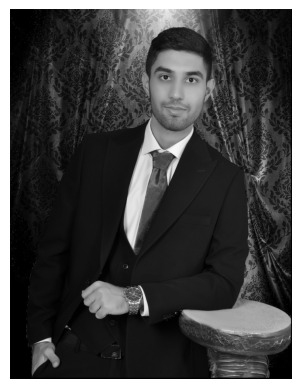

In [377]:
def jpeg_decomp(input_file_path, output_image_path):
    with open(input_file_path, 'r') as file:
        lines = file.readlines()

    # Get quality, width, and height from the metadata
    quality_line = lines[0]
    quality = int(quality_line.split(':')[1].strip())
    size_line = lines[1]
    size_parts = size_line.split(':')[1].strip().split('x')
    height= int(size_parts[0])
    width = int(size_parts[1])
    # get image data as a list of strings
    image_data = [line.strip() for line in lines[2:]]

    # Convert strings to matrices with zigzag method
    matrices = [string_to_matrix(string) for string in image_data]

    # Dequantize
    quantization_matrix = quality_levels[quality]
    dequantized_matrices = [dequantization(matrix, quantization_matrix) for matrix in matrices]

    # Perform IDCT_2D
    idct_matrices = [idct_2d(matrix) for matrix in dequantized_matrices]

    # Put 8x8 pieces together
    reconstructed_image = merge_squares(idct_matrices, height, width)

    # Write the image into the output
    cv.imwrite(output_image_path, reconstructed_image)

    print("Decompressed Reza:")
    plt.imshow(reconstructed_image, cmap='gray')
    plt.axis('off')
    plt.show()

    return reconstructed_image

return_image = jpeg_decomp("Phase1_Pics/reza_compressed.jpeg", "Phase1_Pics/reza_decompressed_Q90.jpeg")

<div dir="rtl">

### سوال اول:<br>
برای فهم بهتر Q-table ها، 5 مربع 8x8 تصادفی از تصویر خود انتخاب کنید. تبدیل DCT را انجام دهید و Heatmap آنها را به ترتیب رسم کنید.(برای رسم Heatmap از کتابخانه seaborn یا تابع پیاده‌سازی شده `plot_random_blocks` کمک بگیرید).
</div>

In [272]:
def plot_random_blocks(n, array, indices=None):
    """
    Inputs:
        n: Number of blocks to plot
        array: A list of blocks
        indices: If None, a random indices whould be selected to plot; otherwise plot the given indecies

    Output:
        indices: returns the ploted indices
    """
    num_blocks = len(array) #.shape[0]

    # Generate random indices for selecting blocks if indices is None
    if np.any(indices == None):
        indices = np.random.choice(num_blocks, n, replace=False)

    # Create a subplot grid for plotting the heatmaps
    num_cols = int(np.ceil(np.sqrt(n)))
    num_rows = int(np.ceil(n / num_cols))
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

    # Plot each block as a heatmap using Seaborn
    for i, idx in enumerate(indices):
        row_idx = i // num_cols
        col_idx = i % num_cols
        block = array[idx]
        sns.heatmap(block, cmap='hot', ax=axes[row_idx, col_idx], cbar=False, annot=True, fmt=".1f")
        axes[row_idx, col_idx].set_title(f"Block {idx} Heatmap")
        axes[row_idx, col_idx].axis('off')

    # Adjust spacing between subplots and display the plot
    fig.tight_layout()
    plt.show()

    # Retuen ploted indices
    return indices

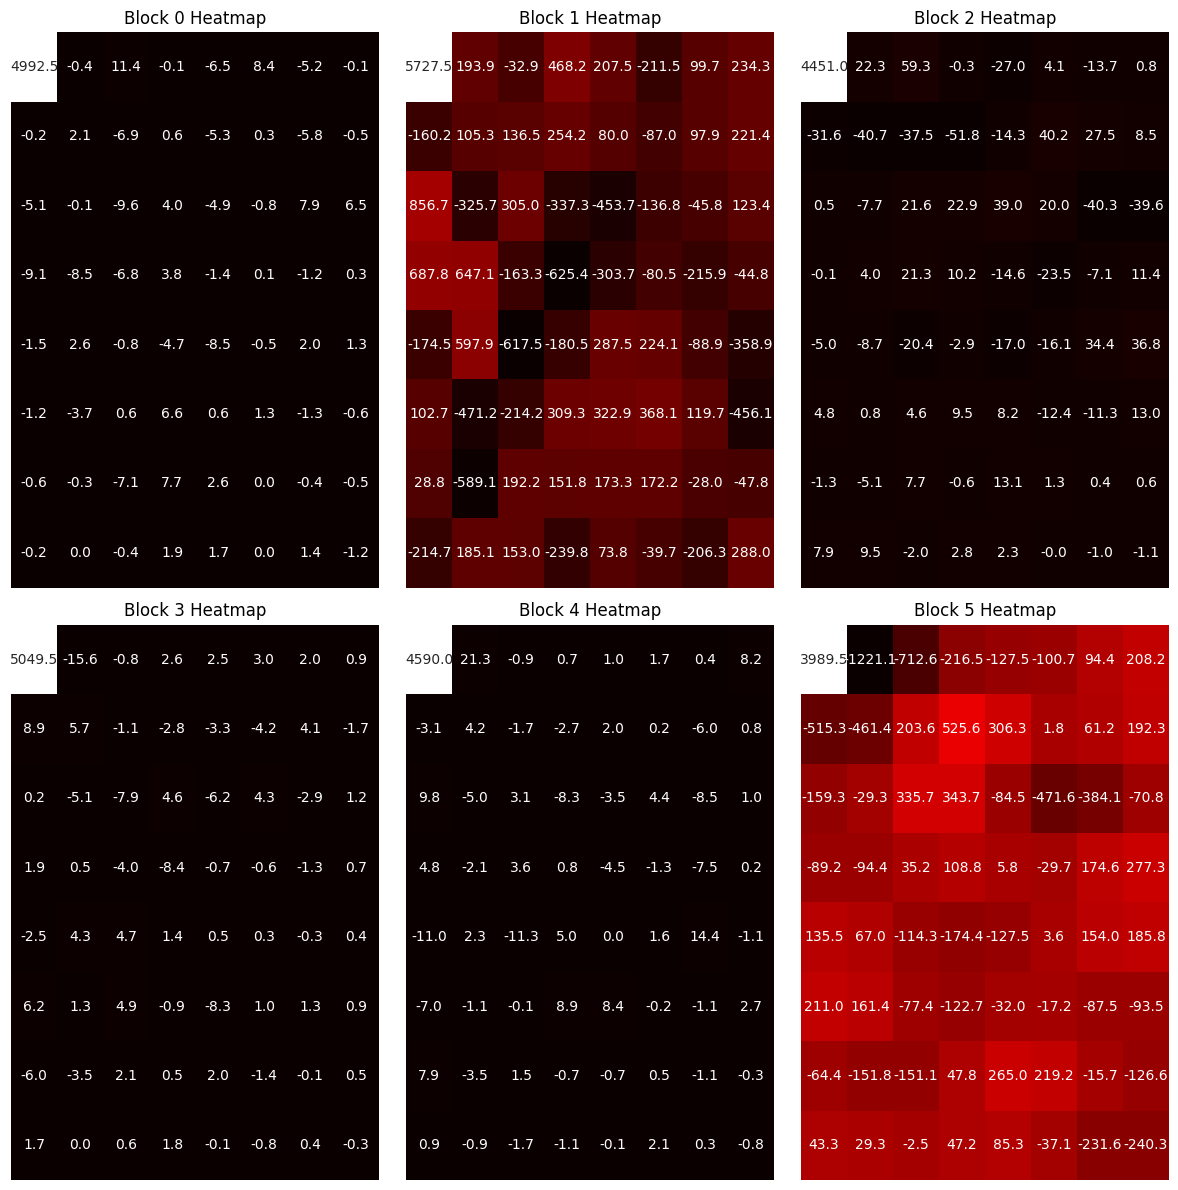

range(0, 6)

In [29]:
image = cv.imread(input_image_path, cv.IMREAD_GRAYSCALE)

img_squares = extract_squares(image)
img_squares = random.sample(squares, 6)

dct_matrices = [dct_2d(s) for s in img_squares]
plot_random_blocks(6, dct_matrices, range(6))

<div dir="rtl">

اکنون به ترتیب Quantization و Dequantization را روی هر کدام با کیفیت ۹۰ انجام دهید و در زیر Heatmap آنها را رسم کنید.

</div>

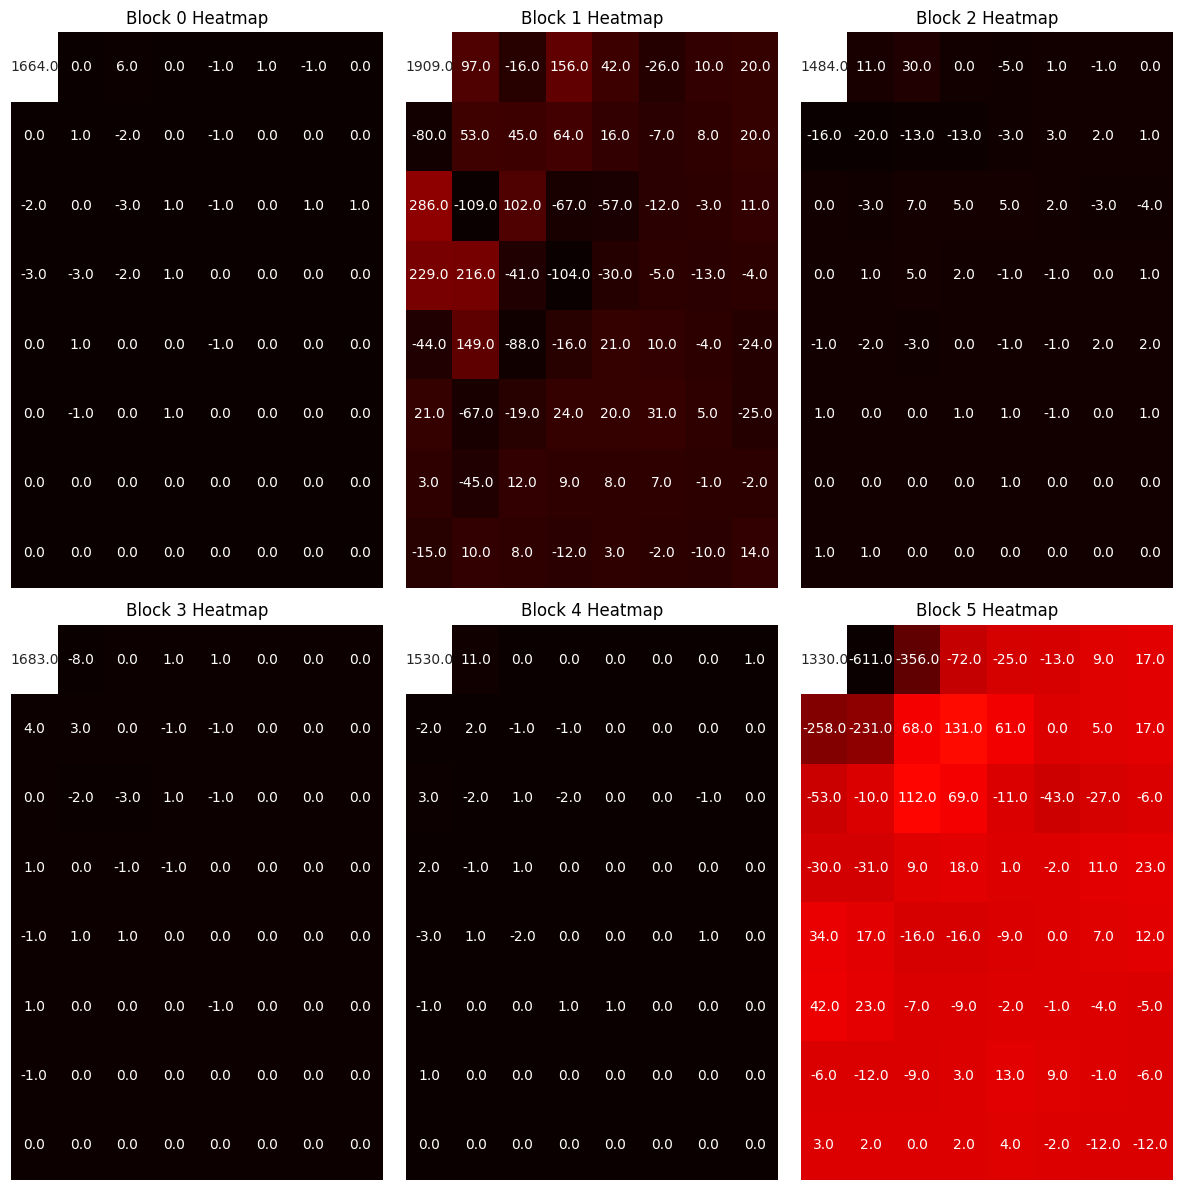

range(0, 6)

In [30]:
Q = 90
quantization_matrix = quality_levels[Q]
quantized_matrixes = [quantization(dct_matrix, quantization_matrix) for dct_matrix in dct_matrices]
plot_random_blocks(6, quantized_matrixes, range(6))

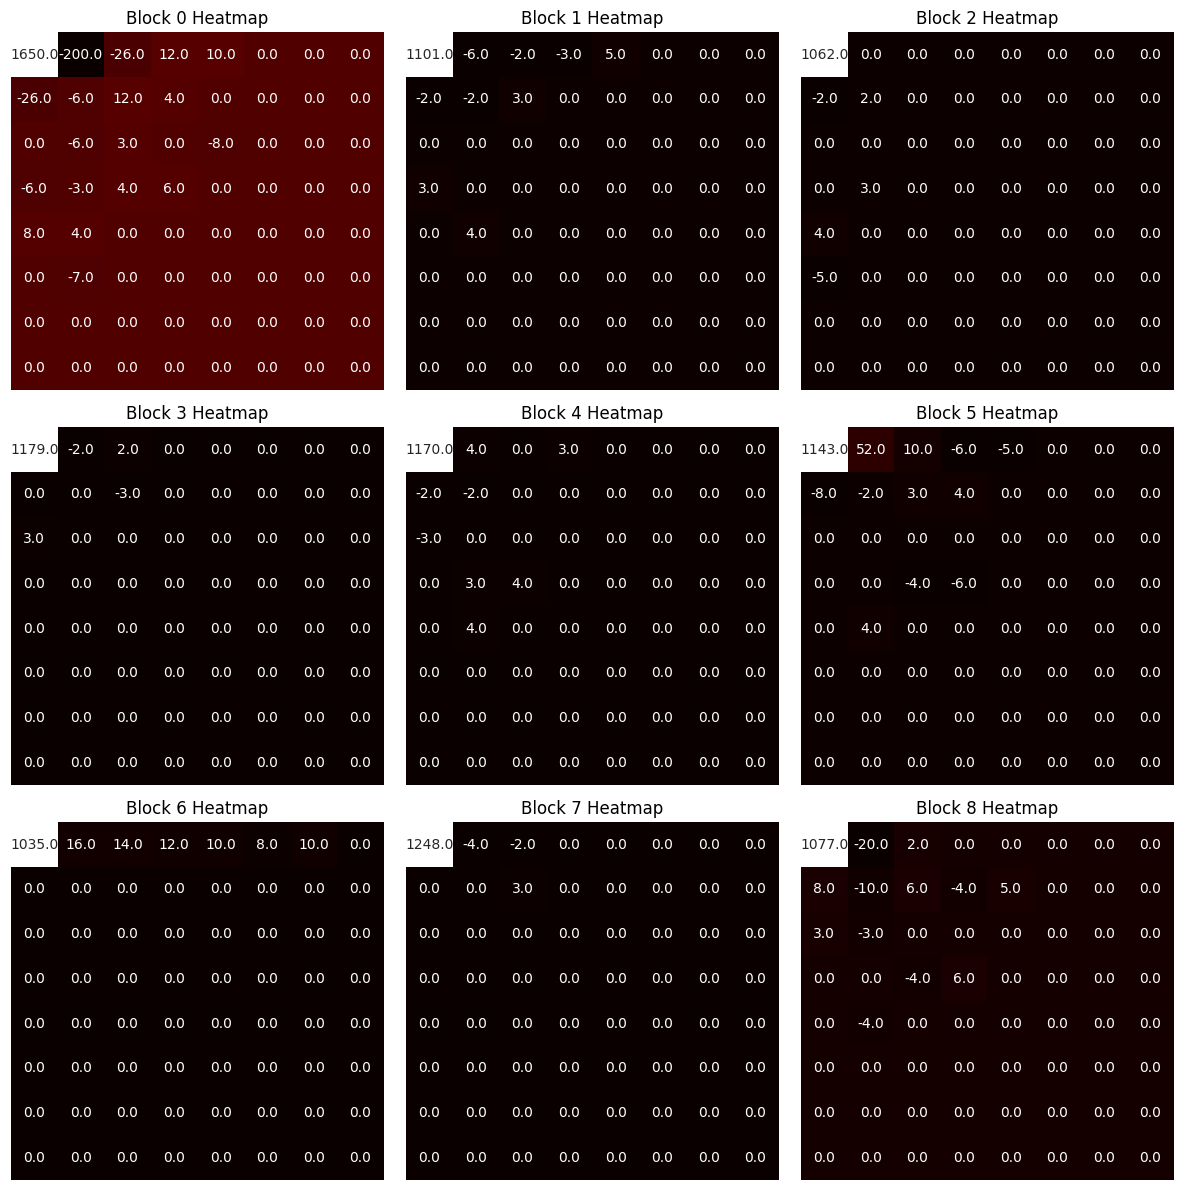

range(0, 9)

In [ ]:
dequantized_matrices = [dequantization(matrix, quantization_matrix) for matrix in quantized_matrixes]
plot_random_blocks(9, dequantized_matrices, range(9))

<div dir="rtl">

عملیات مرحله قبل را با کیفیت ۱۰ انجام دهید.

</div>

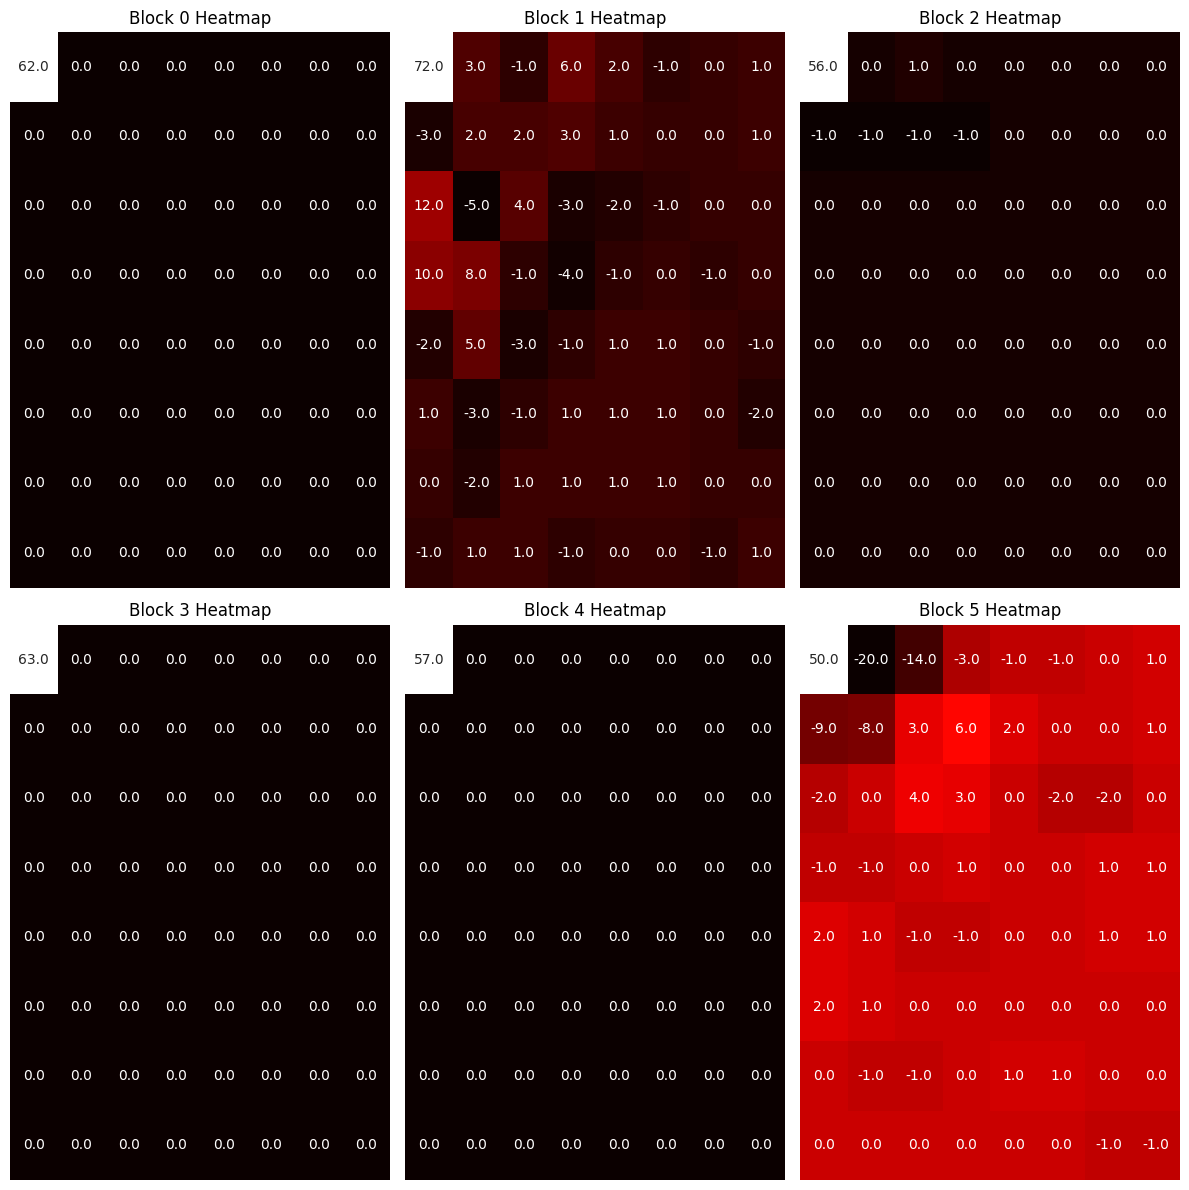

range(0, 6)

In [31]:
Q = 10
quantization_matrix = quality_levels[Q]
quantized_matrixes = [quantization(dct_matrix, quantization_matrix) for dct_matrix in dct_matrices]
plot_random_blocks(6, quantized_matrixes, range(6))

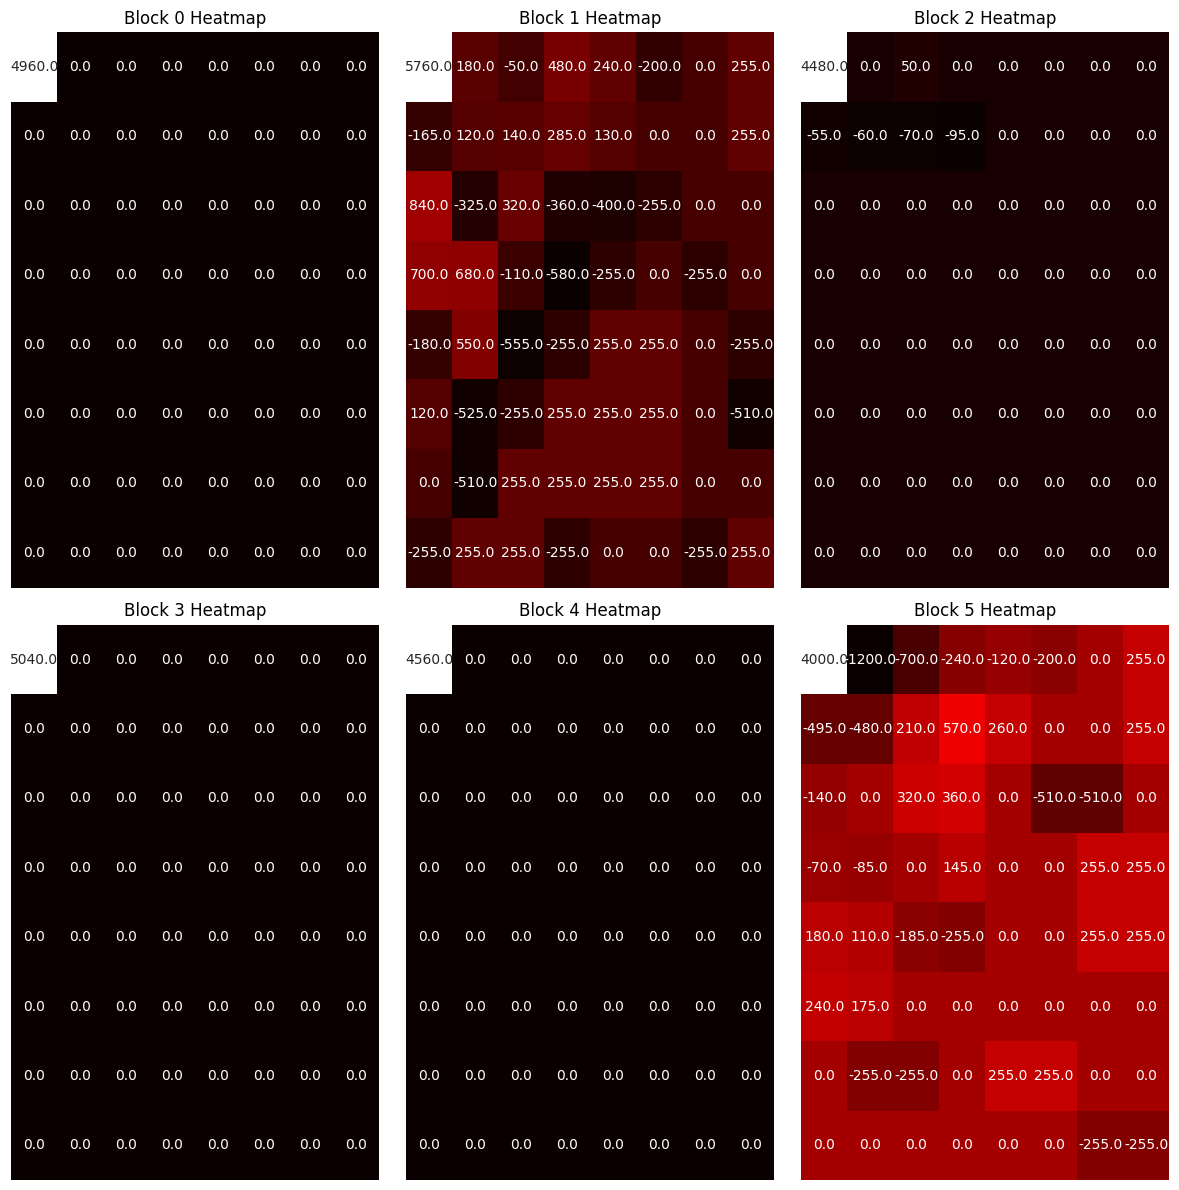

range(0, 6)

In [33]:
dequantized_matrices = [dequantization(matrix, quantization_matrix) for matrix in quantized_matrixes]
plot_random_blocks(6, dequantized_matrices, range(6))

<div dir="rtl">

مجموع تعداد مولفه های صفر در هر 8x8 را در هر کدام از مراحل بالا حساب کنید. با دیدن این اعداد نتیجه بگیرید که JPEG چگونه عکس ها را فشرده سازی می کند و چرا با فشرده سازی بیشتر، کیفیت پایین می آید.

</div>

<div dir="rtl">برای مثال بلوک صفر را پس از اعمال `quantization` در نظر بگیرید. در حالت Quality=90 تعداد صفرهای موجود برابر 45 می باشد، در حالی که این عدد برای Quality=10 به 63 می رسد.
با توجه به فرمول موجود برای DCT خانه بالا و سمت چپ ماتریس نمایانگر تصویر با فرکانس کم (تماما سفید) و خانه سمت راست و پایین ماتریس نمایانگر تصویر با فرکانس زیاد (سفید،سیاه پشت سر هم) می باشد.
حال JPEG با توجه به این Quantization خانه های سمت راست و پایین ماتریس را ضریب بیشتری برای آن در نظر می گیرد تا فرکانس های بالای تصویر را damp کند، چرا که چشم انسان به فرکانس های پایین توجه می کند و فرکانس های بالا معمولا برای لبه ها و گذار سریع از یک رنگ به رنگ دیگر هستند که چسم انسان توجهی به آن ندارد و می توانیم این اطلاعات را حذف کنیم.
در نتیجه با فشرده سازی بیشتر به نوعی ماتریس Quantization را تغییر داده و عناصر بیشتری از جدول را به صفر می رسانیم و لذا در کدگذاری فضای کمتری را اشغال می کنیم. </div>

<div dir="rtl">

### سوال دوم:<br>
عکس داده شده را توسط سه کیفیت ۱۰، ۵۰ و ۹۰ به jpeg تبدیل کنید، بازگردانید و فایل های بازگردانده شده را ذخیره کنید.(از فرمت هایی استفاده کنید که خودشان فشرده‌سازی ندارند)

</div>

Decompressed Reza:


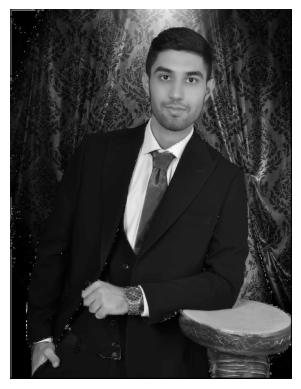

Decompressed Reza:


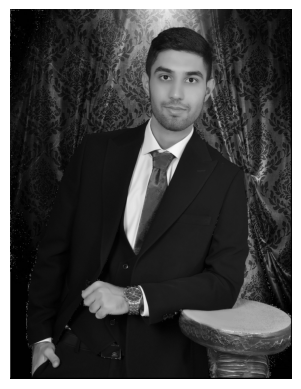

Decompressed Reza:


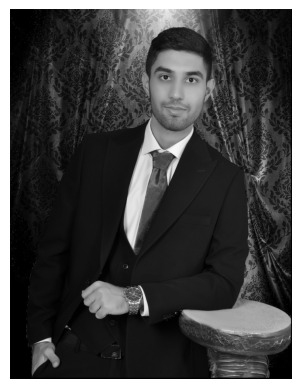

In [266]:
for quality in [10, 50, 90]:
    jpeg_comp("Phase1_Pics/reza.jpg", f"Phase1_Pics/Compresses_jpeg/reza_compressed_Q{quality}.jpeg", quality)
    jpeg_decomp(f"Phase1_Pics/Compresses_jpeg/reza_compressed_Q{quality}.jpeg", f"Phase1_Pics/reza_decompressed_Q{quality}.jpeg")

<div dir="rtl">

اکنون فایل‌های بازگردانده شده و فایل اصلی را نمایش دهید، قدرمطلق اختلاف مقدار هر پیکسل از تصاویر بازسازی‌شده را با پیکسل متناظر در تصویر اصلی پیدا کنید (L1-Norm) و نتیجه را برای سه کیفیت رسم کنید.

</div>

3 above picture are jpeg Q10, Q50, Q90 respectively and original gray-scale picture is shown below:

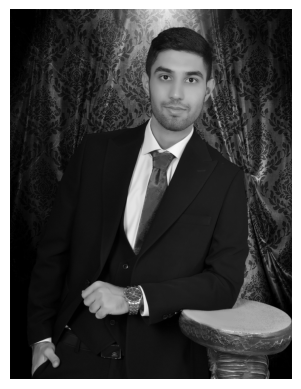

In [269]:
image_path = "Phase1_Pics/reza_gray.jpg"
original_image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

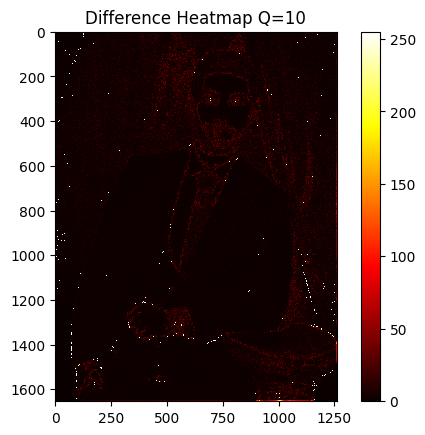

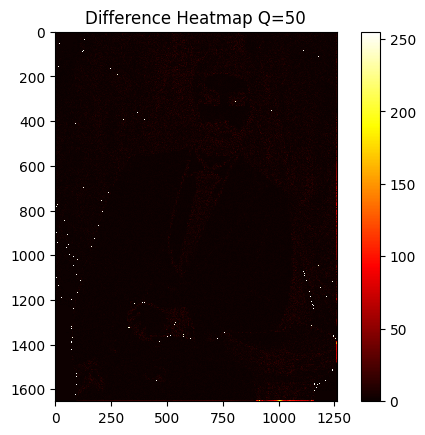

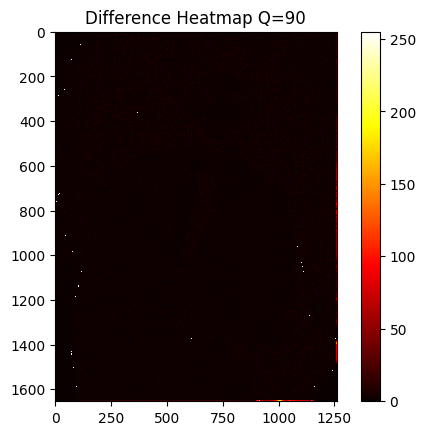

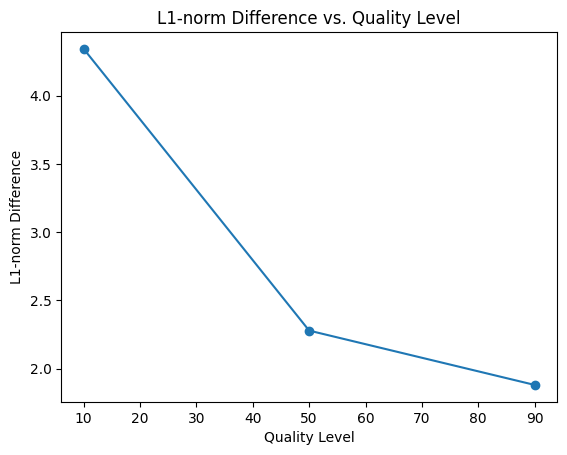

In [278]:
def plot_heatmap(diff, quality):
    plt.imshow(diff, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title(f"Difference Heatmap Q={quality}")
    plt.show()

def calculate_l1_norm(image1, image2, quality):
    diff = np.abs(image1.astype(np.float32) - image2.astype(np.float32))
    plot_heatmap(diff, quality)
    l1_norm = np.sum(diff) / (image1.shape[0] * image1.shape[1])
    return l1_norm

l1_norm_differences = []
qualities = [10, 50, 90]
for quality in qualities:
    recon_image = cv.imread(f"Phase1_Pics/reza_decompressed_Q{quality}.jpeg", cv.IMREAD_GRAYSCALE)
    l1_norm = calculate_l1_norm(original_image, recon_image, quality)
    l1_norm_differences.append(l1_norm)

plt.figure()
plt.plot(qualities, l1_norm_differences, marker='o')
plt.xlabel('Quality Level')
plt.ylabel('L1-norm Difference')
plt.title('L1-norm Difference vs. Quality Level')
plt.show()

<div dir="rtl">

مقدار MSE(mean squared error) را برای سه کیفیت بدست آورید، سایز فایل های فشرده شده را نیز بنویسید و مقدار سایز فایل ها را بسته به کیفیت آن ها با یک رابطه(خطی یا درجه ۲) تقریب بزنید. جواب خود را به صورت خلاصه در زیر بنویسید.

</div>

File size Q=10: 395146 Byte
File size Q=50: 525018 Byte
File size Q=90: 647333 Byte


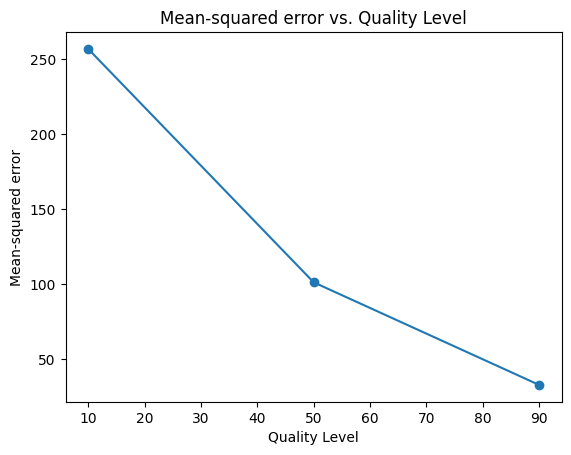

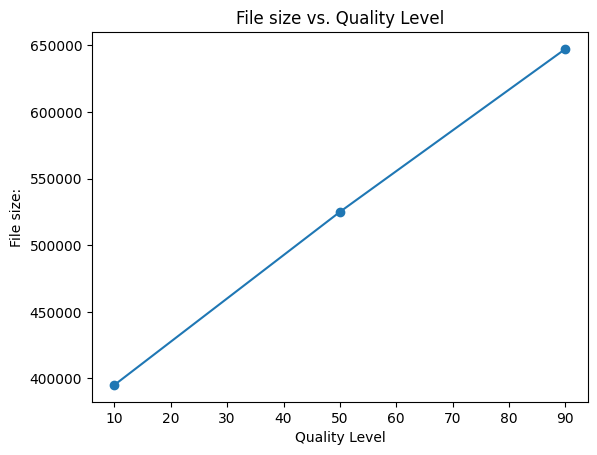

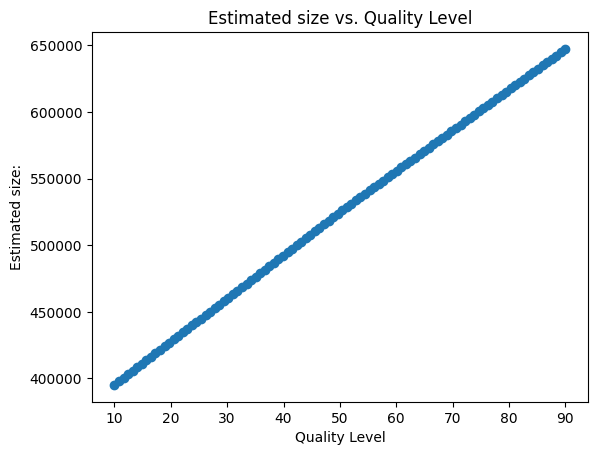

In [281]:
def calculate_mse(image1, image2):
    diff = image1.astype(np.float32) - image2.astype(np.float32)
    mse = np.mean(np.square(diff))
    return mse

mse_values = []
file_sizes = []
qualities = [10, 50, 90]
for quality in qualities:
    recon_image = cv.imread(f"Phase1_Pics/reza_decompressed_Q{quality}.jpeg", cv.IMREAD_GRAYSCALE)
    mse_value = calculate_mse(original_image, recon_image)
    mse_values.append(mse_value)

    file_size = os.path.getsize(f"Phase1_Pics/reza_decompressed_Q{quality}.jpeg")
    file_sizes.append(file_size)
    print(f"File size Q={quality}: {file_size} Byte")

plt.figure()
plt.plot(qualities, mse_values, marker='o')
plt.xlabel('Quality Level')
plt.ylabel('Mean-squared error')
plt.title('Mean-squared error vs. Quality Level')
plt.show()

plt.figure()
plt.plot(qualities, file_sizes, marker='o')
plt.xlabel('Quality Level')
plt.ylabel('File size:')
plt.title('File size vs. Quality Level')
plt.show()

quality_range = np.linspace(qualities[0], qualities[-1], num=100)
estimated_sizes = np.interp(quality_range, qualities, file_sizes)
plt.figure()
plt.plot(quality_range, estimated_sizes, marker='o')
plt.xlabel('Quality Level')
plt.ylabel('Estimated size:')
plt.title('Estimated size vs. Quality Level')
plt.show()

<div dir="rtl">

### سوال سوم:<br>
شما در درس خود DFT را یاد گرفتید. در این سوال می خواهیم ضرایب DFT را به DCT-II تبدیل کنیم تا بیشتر با این تبدیل آشنا شوید.

دنباله اول در زیر را به طول ${n}$ و دنباله ی دوم را به طول ${2n}$ در نظر بگیرید. فرض کنید ضرایب DCT-II دنباله اول برابر با ${d_{k}}$ و ضرایب DFT دنباله دوم برابر با ${c_{k}}$ اند. مقدار ${c_{k}}$ ها را از روی ${d_{k}}$ ها بدست بیاورید.

</div>

${x_1,x_2,x_3,...,x_n}$

${x_1,x_2,x_3,...,x_n,0,0,...,0}$

<div dir="rtl">

$${DCT|| => \displaystyle d_{k}=\sum _{n=0}^{N-1}x_{n}\cos \left[\,{\tfrac {\,\pi \,}{N}}\left(n+{\tfrac {1}{2}}\right)k\,\right]\qquad {\text{ for }}~k=0,\ \dots \ N-1~}$$

</div>

<div dir="rtl">

$${DCT|| => \displaystyle d_{k}=\sum _{n=0}^{N-1}x_{n}\left[\,{\tfrac {1}{2}}\left(e^{j\frac{\pi}{N}\left(n+\frac{1}{2}\right)k} + e^{j\frac{\pi}{N}\left(n+\frac{1}{2}\right)k-}\right)\right]\qquad {\text{ for }}~k=0,\ \dots\ N-1~}$$


</div>

<div dir="ltl">

Twice series has two part, ${x_1,x_2,x_3,...,x_n}$ and 0,0,...,0 and we know that Fourier transform is as below:

$${Fourier => \displaystyle c_{k}=\sum _{n=0}^{2N-1}x_{n} e^{\,{\tfrac {\,-2j\pi kn \,}{2N}}}\qquad {\text{ for }}~k=0,\ \dots \ 2N-1~}$$

for second part because ${x_i}$ is 0, the above formula reduces to below:

$${Fourier => \displaystyle c_{k}=\sum _{n=0}^{N-1}x_{n} e^{\,{\tfrac {\,-j\pi kn \,}{N}}}\qquad {\text{ for }}~k=0,\ \dots \ N-1~}$$

So from this and DCT-|| we obtain before, we can get that ${c_k}$ from ${d_k}$ as below:

</div>

<img src="Items/proof_1.jpeg" alt="OpenAI Logo">

<div>

$${d_{k} = \tfrac {1}{2} \left( c_{k}e^{\tfrac {\,-j\pi k \,}{2N}} + c_{-k}e^{\tfrac {\,j\pi k \,}{2N}} \right)}$$

</div>

## <center>بخش دوم پروژه<br>کار با نویز</center>

<div dir="rtl">

### هدف این بخش:

برای ارسال یک سیگنال از جایی به جای دیگر نیاز به یک کانال داریم. در یک کانال ایده‌آل سیگنال ورودی و خروجی برابر است. همانطور که می دانید در دنیای واقعی کانال ایده‌آل وجود ندارد! سیگنال ها دچار اعوجاج می شوند. روی آنها نویز می افتد و بخشی از آنها از بین می رود. مهندسین برق، کامپیوتر، مکانیک، شیمی و علوم مواد و دانشمندان همواره به دنبال بهتر کردن کانال های ارتباطی هستند.<br> اما می توان این مشکلات را به صورت هوشمندانه دور زد. با دانستن جنس کانال، می توان قبل از ارسال سیگنال، تغییراتی برعکس آنچه در کانال اتفاق می افتد روی سیگنال اعمال کرد، که پس از عبور سیگنال از کانال، حداقل آسیب به سیگنال ما برسد.

</div>

<div dir="rtl">

وظیفه شما این است که برای هر یک از کانال های زیر تابعی طراحی کنید که برعکس کانال عمل کند و با ورودی دادن خروجی تابع شما به کانال، عکس خروجی کانال عکس اولیه باشد. به زبان ساده تر تابع شما تابع معکوس کانال باشد.

</div>

<div dir="rtl">

### ابزار های شما:<br>
شما می توانید به کانال ها ورودی دهید و خروجی را ببینید و در صورتی که نتیجه گیری خاصی کردید آن را با اضافه کردن شکل ورودی و خروجی خود توضیح دهید.<br>
برای دادن ورودی و خروجی کافی است کانال را با python یا python3 اجرا کنید و مسیر به فایل خود را به عنوان آرگومان به آن بدهید.<br>
علاوه بر خود خروجی، شما می توانید تبدیل DCT آن را نیز ببینید و با ورودی مقایسه کنید. در کانال های مخابراتی واقعی رفتار فرکانسی کانال به شدت مهم است و در اینجا نیز با این خصوصیت کانال آشنا خواهید شد. کتابخانه `scipy.fftpack` دارای تبدیل DCT یک بعدی است، با دانش خود از بخش اول پروژه از روی آن تبدیل DCT دوبعدی بسازید و استفاده کنید.<br>


In [1]:
from scipy.fftpack import dct, idct
import subprocess
from PIL import Image, ImageChops

<div dir="rtl">
در صورتی که فایل های کامپایل شده اجرا نمی شوند، پایتون خود را به آخرین نسخه (3.11.4) ارتقا دهید و کتابخانه های زیر را روی آن نصب کنید.<br>
<br>
<div dir="ltr">
PIL(using pip: pip install pillow)<br>
SciPy(using pip: pip install scipy)<br>
numpy(using pip: pip install numpy)
</div>
مثال اجرای کد:
</div>
<div dir="ltr">
python "C:\Users\Lenovo\Desktop\channel1.cpython-311.pyc" "C:\Users\Lenovo\Desktop\snapshot.jpg"
</div>
<div dir="rtl">
نکته:<br>
به خاطر داشته باشید که در صورتی که عدد شما در نوشتن یک عکس از بازه (0,255) خارج شود، کتابخانه آن را به پیمانه 256 حساب می کند و در خروجی قرار می دهد. برای جلوگیری از این اتفاق همواره خروجی های خود را با 255 مینیمم و با 0 ماکزیمم بگیرید.
<div>

In [282]:
def run_command(command):
    process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()

    if process.returncode == 0:
        # print("Command executed successfully.")
        printItIfYouWant = 0
    else:
        print("Error executing command.")
        print("Stdout:", stdout.decode())
        print("Stderr:", stderr.decode())

(height, width):  (1350, 1800, 3)


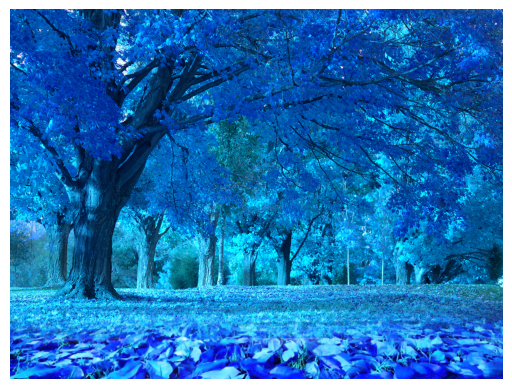

True

In [283]:
image_path = "Phase2_Pics/Fall.png"
image = cv.imread(image_path)
image_gray = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
print("(height, width): ", image.shape) # height, width
plt.imshow(image)
plt.axis('off')
plt.show()
cv.imwrite("Phase2_Pics/Fall_gray.png", image_gray)

<div dir="rtl">

### کانال اول:<br>
اگر با گوشی های نسبتا قدیمی زیر نور LED یا مهتابی خانه یا دانشگاه عکس گرفته باشید، متوجه خطوط عمودی، افقی سیاه روشن می شوید. این اتفاق به دلیل کم و زیاد شدن نور LED ها به صورت سینوسی به دلیل سینوسی بودن برق شهر می باشد. اکنون ماهیت کانال را متوجه شده ایم و می خواهیم با انداختن سیگنال معکوسی آن را از بین ببریم. سعی کنید این کار را انجام دهید و نتیجه و کد خود را در زیر بنویسید.

<div style="text-align:center">
    <img src="Items/Channel1_sample2.jpg" alt="Drawing" style="width: 400px;"/><br>
    <center>این نویز در عکس بالا مشهود است، در فیلم برداری و عکس برداری به ترتیب به آن flicker noise و rolling shutter effect می گویند.</center>
</div>

<br>
<br>

<div style="text-align:center">
    <img src="Items/Channel1_sample1.jpg" alt="Drawing" style="width: 400px;"/><br>
    <center>این عکس یکی از تمرینات من زیر نور LED است که باعث مطرح شدن این سوال شد.</center>
</div>

<br>
<br>

<div style="text-align:center">
    <img src="Items/Channel1_sample3.jpg" alt="Drawing" style="width: 400px;"/>
    <br><center>عکس بالا هنگام رعد و برق گرفته شده است، می توان step response دوربین را به این وسیله مشاهده کرد.
</div>

</div>

Channel 1:

Finding A and frequency with a sample:

In [287]:
def find_frequency(data_list):
    # Perform FFT on the data
    fft_result = np.fft.fft(data_list)
    
    # Calculate the frequencies corresponding to the FFT result
    num_samples = len(data_list)
    sample_rate = 1  # Assuming one unit of time per data point
    frequencies = np.fft.fftfreq(num_samples, d=1/sample_rate)
    
    # Find the index of the maximum amplitude (excluding the DC component)
    max_amplitude_index = np.argmax(np.abs(fft_result[1:])) + 1
    
    # Calculate the frequency corresponding to the maximum amplitude
    frequency = frequencies[max_amplitude_index]
    
    return frequency

In [293]:
width, height = 1000, 1000
value = 128
img_array = np.full((height, width, 3), value, dtype=np.uint8)
cv.imwrite('128.png', img_array)

True

In [294]:
run_command("python Channels/channel1.cpython-311.pyc Phase2_Pics/128.png")
picture = cv.imread("Phase2_Pics/128.png")
noisy_picture = cv.imread("Phase2_Pics/128_ch1.png")
diff = noisy_picture.astype(int) - picture.astype(int)
frequency = find_frequency([i[0] for i in diff[0]])
print("The frequency of the sinusoidal function is:", frequency)
print(f"A: {np.max(diff)}")

# run_command("python Channels/channel1.cpython-311.pyc Phase2_Pics/Fall.png")
# picture = cv.imread("Phase2_Pics/Fall.png")
# noisy_picture = cv.imread("Phase2_Pics/Fall_ch1.png")
# diff = noisy_picture.astype(int) - picture.astype(int)
# print(f"A: {np.max(diff)}")

The frequency of the sinusoidal function is: 0.016
A: 40


Add sinusoidal noise function:

In [305]:
def add_noise(original_image):
    height, width, channels = original_image.shape

    frequency = height * 16 * (1e-6)
    phase = 0 # np.random.uniform(0, 2 * np.pi)

    x_values = np.arange(width)

    sin_noise = 40 * np.sin(2 * np.pi * frequency * x_values + phase)
    sin_noise = np.repeat(sin_noise[:, np.newaxis], channels, axis=1)
    sin_noise = np.tile(sin_noise, (height, 1, 1)).astype(int)

    noisy_image = original_image + sin_noise
    noisy_image = np.clip(noisy_image, 0, 255)

    return noisy_image

In [298]:
image_path = "128_ch1.png"
noisy_picture = cv.imread(image_path)
a = add_noise(noisy_picture)

In [301]:
def calculate_mse(image1_path, image2_path):
    image1 = cv.imread(image1_path)
    image2 = cv.imread(image2_path)
    diff = image1.astype(np.float32) - image2.astype(np.float32)
    mse = np.mean(np.square(diff))
    return mse

In [306]:
for i in range(30):
    image_path = "Phase2_Pics/128.png"
    picture = cv.imread(image_path)

    noisy_picture = add_noise(picture)
    cv.imwrite('Phase2_Pics/PermanentNoisy/128Noisy.png', noisy_picture)

    run_command("python Channels/channel1.cpython-311.pyc Phase2_Pics/PermanentNoisy/128Noisy.png")

    if calculate_mse('Phase2_Pics/PermanentNoisy/128Noisy_ch1.png', 'Phase2_Pics/128.png') < 40:
        _ = cv.imread('Phase2_Pics/PermanentNoisy/128Noisy_ch1.png')
        cv.imwrite(f'Phase2_Pics/PermanentNoisy/good{i}.png', _)
        print(calculate_mse('Phase2_Pics/PermanentNoisy/128Noisy_ch1.png', '128.png'))


19.474


In [308]:
def send_new_picture(image_ground_truth_path, new_image_path):
    picture = cv.imread(new_image_path)

    noisy_picture = add_noise(picture)
    temp_noisy_img_path = f'Phase2_Pics/PermanentNoisy/{new_image_path.split("/")[-1][:-4]}Noisy'
    cv.imwrite(temp_noisy_img_path+".png", noisy_picture)

    run_command(f"python Channels/channel1.cpython-311.pyc {temp_noisy_img_path}.png")

    mse = calculate_mse(temp_noisy_img_path + "_ch1.png", image_ground_truth_path)
    return mse

<div dir="rtl">

غیر ممکن است نه؟ به علت اینکه عرض از مبدا نویز همواره تغییر می کند. پس برای اینکه این نویز را کنسل کنیم باید سیگنال را چندین بار ارسال کنیم و دعا کنیم که در یکی از ارسال ها نویز و تغییرات اضافه ما روی سیگنال همفاز شوند. امید ریاضی تعداد دفعاتی که لازم است سیگنال را ارسال کنیم تا mean square error ما از 2% کمتر شود را حساب کنید.

</div>

<div dir="rtl">

<div style="text-align:center">
    <img src="Items/proof.jpg" alt="Drawing" />
</div>

</div>  

<div dir="rtl">

### کانال دوم و سوم:<br>
این کانال ها نسبت به رنگ حساس نیستند. برای یافتن اطلاعات بیشتر، ورودی و خروجی کانال را در حوزه فرکانس با هم مقایسه کنید. برای نمایش مقایسه خود می توانید از heatmap استفاده کنید یا اعداد مقایسه شده خود را بر روی یک تصویر نمایش دهید. جواب خود را به صورت کامل در زیر بنویسید.

</div>

In [325]:
image_path = "Phase2_Pics/Fall.png"
picture = cv.imread(image_path)
original_picture_freq = dct(dct(dct(picture, axis=0, norm='ortho'), axis=1, norm='ortho'), axis=2, norm='ortho')

run_command(f"python Channels/channel2.cpython-311.pyc {image_path}")
run_command(f"python Channels/channel3.cpython-311.pyc {image_path}")

In [339]:
noisy_picture_channel2 = cv.imread("Phase2_Pics/Fall_ch2.png")
noisy_picture_channel2_freq = dct(dct(dct(noisy_picture_channel2, axis=0, norm='ortho'), axis=1, norm='ortho'), axis=2, norm='ortho')

noisy_picture_channel3 = cv.imread("Phase2_Pics/Fall_ch3.png")
noisy_picture_channel3_freq = dct(dct(dct(noisy_picture_channel3, axis=0, norm='ortho'), axis=1, norm='ortho'), axis=2, norm='ortho')

In [337]:
print(original_picture_freq)

[[[ 2.67432085e+05 -1.78151858e+05 -8.03753010e+03]
  [ 1.03290183e+03  2.07180474e+03 -1.04484571e+03]
  [-8.18365849e+03  2.89876767e+03  4.98402970e+03]
  ...
  [ 2.22788174e+00 -1.31809715e+00  1.78978627e+00]
  [-1.70949790e+01  4.93964370e+00  5.56907417e+00]
  [ 3.86228787e+00 -4.95600593e+00 -4.50101423e+00]]

 [[-4.72681357e+04  1.12646536e+04  6.96589490e+03]
  [-7.02467682e+03 -5.31676555e+02  3.27105757e+03]
  [ 9.75481456e+03 -3.36418204e+03 -1.14233151e+03]
  ...
  [ 7.91933201e+00 -8.09774928e+00 -1.19544735e-01]
  [-9.00622924e+00 -2.33297095e+00 -2.29085554e+00]
  [ 2.28138251e+00 -1.23737957e+00  2.12362402e-01]]

 [[ 1.55483635e+04 -5.12455397e+03  1.27114949e+04]
  [ 3.56303333e+03 -3.93315392e+03 -1.32304464e+03]
  [ 2.84041713e+02 -1.45704378e+03 -1.11971223e+03]
  ...
  [ 7.20825575e+00 -3.32416561e+00  9.56411309e-01]
  [ 1.15535027e-01 -4.69162744e+00 -9.83820560e-01]
  [ 6.31001727e-01 -2.13362280e+00  2.00157708e+00]]

 ...

 [[-1.52293179e+01 -2.65484155e+00

In [340]:
print(noisy_picture_channel2_freq)

[[[ 2.64590730e+05 -1.66762825e+05 -8.41829505e+03]
  [ 9.66948272e+02  2.11402475e+03 -9.48362331e+02]
  [-7.86431385e+03  1.49696220e+03  4.97115360e+03]
  ...
  [-8.78362589e+00 -4.81475549e+01 -3.93160170e+00]
  [-1.37283034e+01  4.03960741e+01  1.00927881e+01]
  [ 2.87514729e+00  6.62807556e+00  5.49399664e+00]]

 [[-4.29866904e+04  7.54942657e+03  1.00409047e+04]
  [-5.74007479e+03  1.72568123e+02  4.13794415e+03]
  [ 9.39588567e+03 -1.46839923e+03 -1.05996524e+03]
  ...
  [-3.73534035e+01  3.26425743e+01 -2.47237740e+01]
  [ 2.79149539e+01 -2.40641291e+01  4.54718919e+00]
  [ 3.38956291e+00  2.75030520e+01  2.42318110e+00]]

 [[ 1.30057445e+04 -3.35257947e+03  1.03027684e+04]
  [ 4.24925004e+03 -2.49890529e+03 -6.95926714e+02]
  [ 8.15662497e+02 -4.06617848e+02 -5.01181033e+02]
  ...
  [ 2.69789494e+01 -1.61274266e+01  1.38901768e+01]
  [-7.69512802e-01 -3.01473621e+01 -5.61291898e+00]
  [ 9.47291234e+00 -1.04030390e+01 -2.31787921e-01]]

 ...

 [[ 1.07749238e+01 -3.14386961e+01

In [341]:
print(noisy_picture_channel3_freq)

[[[ 3.09490995e+05 -4.28717665e+04  7.65410223e+03]
  [-3.48843527e+03 -1.71191165e+03 -1.56058141e+03]
  [-4.56023975e+03 -5.02026938e+03  2.50035822e+03]
  ...
  [-5.76457060e+01  7.45574321e+01  3.62819603e+01]
  [ 5.26884694e+01  2.67708307e+01  9.26600875e+00]
  [ 1.05597182e+02  4.44130075e+01  8.09833443e+01]]

 [[-1.19883257e+04 -2.89557897e+03  1.30563291e+04]
  [-4.55100313e+03 -5.79699938e+03  1.13722987e+03]
  [ 1.79892005e+03  7.80268964e+02 -1.53411270e+03]
  ...
  [-8.38827393e+00  8.37278917e+00  2.61952870e+01]
  [-3.00194885e+01  1.09538149e+01  7.77548829e+01]
  [ 4.37943193e+01  3.02379001e+01  1.92677823e+01]]

 [[ 3.85356997e+03 -6.14742279e+03  1.15352157e+03]
  [ 3.69967941e+03  4.62320568e+02  6.61844257e+02]
  [ 1.62381445e+03  1.54546258e+03  2.00163987e+03]
  ...
  [ 1.35979845e+01  8.64198284e+00 -4.19944133e+01]
  [-2.88994927e+01 -1.24845678e+02 -1.77175402e+01]
  [-1.04166155e+01  9.30943955e+01  7.49648935e+01]]

 ...

 [[-2.93655756e+01 -1.27264854e+02

Channel 2:

Find out H(W) of Noisy Channel for a sample:

In [343]:
dct_mul_channel2 = noisy_picture_channel2_freq / original_picture_freq
dct_mul_channel3 = noisy_picture_channel3_freq / original_picture_freq

We want to pass a new image through this noisy channel:

In [344]:
def send_new_picture_channel2(image_ground_truth_path, new_image_path):
    run_command(f"python Channels/channel2.cpython-311.pyc {new_image_path}.png")

    image_path = new_image_path + "_ch2.png"
    noisy_picture = cv.imread(image_path)
    noisy_picture_freq = dct(dct(dct(noisy_picture, axis=0, norm='ortho'), axis=1, norm='ortho'), axis=2, norm='ortho')

    recon_picture_freq = noisy_picture_freq.astype(float)
    recon_picture_freq = noisy_picture_freq / dct_mul_channel2

    recon_picture = idct(idct(idct(recon_picture_freq, axis=0, norm='ortho'), axis=1, norm='ortho'), axis=2, norm='ortho')

    cv.imwrite(new_image_path + "ch2_result.png", recon_picture)

    mse = calculate_mse(image_ground_truth_path, new_image_path + "ch2_result.png")
    return mse

new_image_path = "Phase2_Pics/Fall-Copy"
image_ground_truth_path = "Phase2_Pics/Fall.png"
print("mse: ", send_new_picture_channel2(image_ground_truth_path, new_image_path))

0.0


Channel 3:

We want to pass a new image through this noisy channel:

In [345]:
def send_new_picture_channel3(image_ground_truth_path, new_image_path):
    run_command(f"python Channels/channel3.cpython-311.pyc {new_image_path}.png")

    image_path = new_image_path + "_ch3.png"
    noisy_picture = cv.imread(image_path)
    noisy_picture_freq = dct(dct(dct(noisy_picture, axis=0, norm='ortho'), axis=1, norm='ortho'), axis=2, norm='ortho')

    recon_picture_freq = noisy_picture_freq.astype(float)
    recon_picture_freq = noisy_picture_freq / dct_mul_channel3

    recon_picture = idct(idct(idct(recon_picture_freq, axis=0, norm='ortho'), axis=1, norm='ortho'), axis=2, norm='ortho')

    cv.imwrite(new_image_path + "ch3_result.png", recon_picture)

    mse = calculate_mse(image_ground_truth_path, new_image_path + "ch3_result.png")
    return mse

new_image_path = "Phase2_Pics/Fall-Copy"
image_ground_truth_path = "Phase2_Pics/Fall.png"
print("mse: ", send_new_picture_channel3(image_ground_truth_path, new_image_path))

0.0


<div dir="rtl">


### سوالات:


</div>

<div dir="rtl">

سوال اول:<br>
یک عکس png با کیفیت و نسبت تصویر HD انتخاب کنید. آن را از کانال اول عبور دهید و mean square error آن را با عکس اولیه بدست آورید. اکنون هم عکس اولیه و هم عکس نویزی را به jpeg تبدیل کنید و دوباره mean square error خود را گزارش کنید. بهتر است از کیفیت ۵۰ برای فشرده‌سازی استفاده کنید.

</div>

mse before converting to jpeg between input picture and its noisy picture:  726.9759
Decompressed Reza:


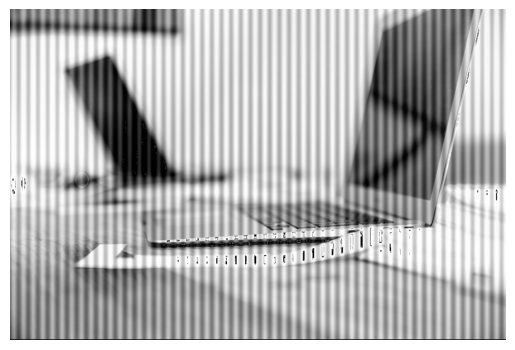

mse after converting to jpeg between input picture and its noisy picture:  915.5303


In [359]:
Laptop_img_path = "Phase2_Pics/Laptop.png"
Laptop_gray_path = "Phase2_Pics/Laptop_gray.png"
picture = cv.imread(Laptop_img_path, cv.IMREAD_GRAYSCALE)
cv.imwrite(Laptop_gray_path, picture)

run_command(f"python Channels/channel1.cpython-311.pyc {Laptop_img_path}")
noisy_IMG_path = "Phase2_Pics/Laptop_ch1.png"
noisy_IMG_gray_path = "Phase2_Pics/Laptop_ch1_gray.png"
noisy_picture = cv.imread(noisy_IMG_path, cv.IMREAD_GRAYSCALE)
cv.imwrite(noisy_IMG_gray_path, noisy_picture)

mse = calculate_mse(Laptop_gray_path, noisy_IMG_gray_path)
print("mse before converting to jpeg between input picture and its noisy picture: ", mse)

# jpeg_comp(Laptop_gray_path, "Phase2_Pics/PermanentNoisy/Laptop_gray_compressed_Q50.jpeg", 50)
IMG_path = "Phase2_Pics/Laptop_gray_decompressed_Q50.jpeg"
# jpeg_decomp("Phase2_Pics/PermanentNoisy/Laptop_gray_compressed_Q50.jpeg", IMG_path)

jpeg_comp(noisy_IMG_gray_path, "Phase2_Pics/PermanentNoisy/Laptop_ch1_gray_compressed_Q50.jpeg", 50)
noisy_IMG_path = "Phase2_Pics/Laptop_ch1_gray_decompressed_Q50.jpeg"
jpeg_decomp("Phase2_Pics/PermanentNoisy/Laptop_ch1_gray_compressed_Q50.jpeg", noisy_IMG_path)

mse = calculate_mse(IMG_path, noisy_IMG_path)
print("mse after converting to jpeg between input picture and its noisy picture: ", mse)

your answer

<div dir="rtl">

سوال دوم:<br>
سوال بالا را به ازای کانال دوم تکرار کنید و نتیجه را در زیر بنویسید.

</div>

your answer

mse before converting to jpeg between input picture and its noisy picture:  97.75337
Decompressed Reza:


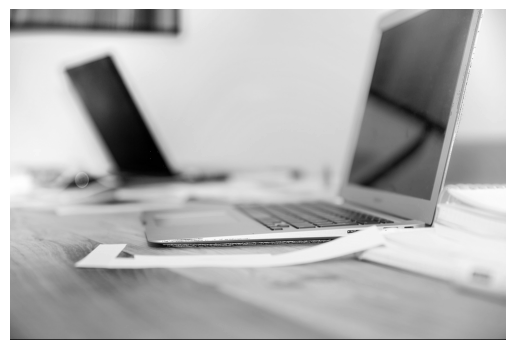

mse after converting to jpeg between input picture and its noisy picture:  159.28294


In [358]:
Laptop_img_path = "Phase2_Pics/Laptop.png"
Laptop_gray_path = "Phase2_Pics/Laptop_gray.png"
picture = cv.imread(Laptop_img_path, cv.IMREAD_GRAYSCALE)
cv.imwrite(Laptop_gray_path, picture)

run_command(f"python Channels/channel2.cpython-311.pyc {Laptop_img_path}")
noisy_IMG_path = "Phase2_Pics/Laptop_ch2.png"
noisy_IMG_gray_path = "Phase2_Pics/Laptop_ch2_gray.png"
noisy_picture = cv.imread(noisy_IMG_path, cv.IMREAD_GRAYSCALE)
cv.imwrite(noisy_IMG_gray_path, noisy_picture)

mse = calculate_mse(Laptop_gray_path, noisy_IMG_gray_path)
print("mse before converting to jpeg between input picture and its noisy picture: ", mse)

# jpeg_comp(Laptop_gray_path, "Phase2_Pics/PermanentNoisy/Laptop_gray_compressed_Q50.jpeg", 50)
IMG_path = "Phase2_Pics/Laptop_gray_decompressed_Q50.jpeg"
# jpeg_decomp("Phase2_Pics/PermanentNoisy/Laptop_gray_compressed_Q50.jpeg", IMG_path)

jpeg_comp(noisy_IMG_gray_path, "Phase2_Pics/PermanentNoisy/Laptop_ch2_gray_compressed_Q50.jpeg", 50)
noisy_IMG_path = "Phase2_Pics/Laptop_ch2_gray_decompressed_Q50.jpeg"
jpeg_decomp("Phase2_Pics/PermanentNoisy/Laptop_ch2_gray_compressed_Q50.jpeg", noisy_IMG_path)

mse = calculate_mse(IMG_path, noisy_IMG_path)
print("mse after converting to jpeg between input picture and its noisy picture: ", mse)

<div dir="rtl">

سوال سوم:<br>
سوال بالا را به ازای کانال سوم تکرار کنید و نتیجه را در زیر بنویسید.

</div>

your answer

mse before converting to jpeg between input picture and its noisy picture:  500.7548
Decompressed Reza:


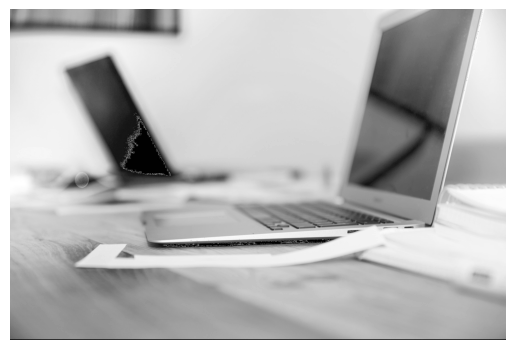

mse after converting to jpeg between input picture and its noisy picture:  624.70123


In [361]:
Laptop_img_path = "Phase2_Pics/Laptop.png"
Laptop_gray_path = "Phase2_Pics/Laptop_gray.png"
picture = cv.imread(Laptop_img_path, cv.IMREAD_GRAYSCALE)
cv.imwrite(Laptop_gray_path, picture)

# run_command(f"python Channels/channel3.cpython-311.pyc {Laptop_img_path}")
noisy_IMG_path = "Phase2_Pics/Laptop_ch3.png"
noisy_IMG_gray_path = "Phase2_Pics/Laptop_ch3_gray.png"
noisy_picture = cv.imread(noisy_IMG_path, cv.IMREAD_GRAYSCALE)
cv.imwrite(noisy_IMG_gray_path, noisy_picture)

mse = calculate_mse(Laptop_gray_path, noisy_IMG_gray_path)
print("mse before converting to jpeg between input picture and its noisy picture: ", mse)

jpeg_comp(Laptop_gray_path, "Phase2_Pics/PermanentNoisy/Laptop_gray_compressed_Q50.jpeg", 50)
IMG_path = "Phase2_Pics/Laptop_gray_decompressed_Q50.png"
jpeg_decomp("Phase2_Pics/PermanentNoisy/Laptop_gray_compressed_Q50.jpeg", IMG_path)

# jpeg_comp(noisy_IMG_gray_path, "Phase2_Pics/PermanentNoisy/Laptop_ch3_gray_compressed_Q50.jpeg", 50)
noisy_IMG_path = "Phase2_Pics/Laptop_ch3_gray_decompressed_Q50.png"
# jpeg_decomp("Phase2_Pics/PermanentNoisy/Laptop_ch3_gray_compressed_Q50.jpeg", noisy_IMG_path)

mse = calculate_mse(IMG_path, noisy_IMG_path)
print("mse after converting to jpeg between input picture and its noisy picture: ", mse)

<div dir="rtl">

سوال چهارم:<br>
با مقایسه نتایج بالا بگویید که خطای باز‌سازی تبدیل jpeg کدام دسته از نویز ها را حذف بیشتر است و کدام دسته را به خوبی بازسازی می‌کند؟.

</div>

<div dir="rtl">

کانال 1 تقریبا 200، کانال دو تقریبا 60 و کانال سوم تقریبا 120 واحد خطا به خطای موجود پیش از تبدیل به jpeg اضافه می کنند.

به طور کلی به نظر می رسد، پاسخ این سوال بسته به عکس ورودی متفاوت شود ولی به طور کلی انتظار داریم در فرآیند jpeg فرکانس های بالا حذف شود. 
با توجه به اینکه کانال اول نویز سینوسی داشته و نویز به صورت تدریجی اضافه و کم می شود می توان گفت فرکانس کلی تغییرات در حالت کلی کم است مگر آنکه ورودی موجود عکسی با ارتفاع زیاد باشد، آنگاه فرکانس نویز تشدید شده و انتظار می رود که این نویز ها را تشخیص داده و آن را حذف کند. 

کانال دوم دارای نویزهای نقطه ای بوده و jpeg به خوبی می تواند این نویز ها را حذف کند. دلیل کم بودن mse در اینجا تغییرات کم تصویر نویزی به نسبت تصویر اصلی است و این کانال برای این عکس نویز زیادی ایجاد نمی کند.

</div>